In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("titanic.csv")

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['Age'].head(6)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
Name: Age, dtype: float64

In [5]:
data_row_del=df.dropna(axis=0)
data_row_del['Age'].head(6)

1     38.0
3     35.0
6     54.0
10     4.0
11    58.0
21    34.0
Name: Age, dtype: float64

In [7]:
(df.isnull().sum())/891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
data_col_del=df.dropna(thresh=500,axis=1)

In [9]:
df.shape, data_col_del.shape

((891, 12), (891, 11))

In [10]:
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [12]:
df['Cabin'].fillna(value='missing')


0      missing
1          C85
2      missing
3         C123
4      missing
        ...   
886    missing
887        B42
888    missing
889       C148
890    missing
Name: Cabin, Length: 891, dtype: object

In [13]:
df['Age'].fillna(value=999)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
       ...  
886     27.0
887     19.0
888    999.0
889     26.0
890     32.0
Name: Age, Length: 891, dtype: float64

In [15]:
 data_replace=df.copy()

In [16]:
data_replace['Cabin_na']=(df['Cabin'].isnull()).astype('int')

In [17]:
data_replace['Cabin_na']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_na, Length: 891, dtype: int32

In [18]:
#categorical -mode
#numerical -mean , mode


In [19]:
mean_val=df['Age'].mean()

In [20]:
data_cleaned=df.copy()

In [21]:
data_cleaned['Age']=df['Age'].fillna(value=mean_val)

In [22]:
data_cleaned['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [25]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
data_cleaned['Embarked']=df['Embarked'].fillna(value=df['Embarked'].mode())

In [29]:
data_cleaned['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [30]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [32]:
df[['Name','Age']].loc[(df['Age'].isnull())].head(20)

,Name,Age
5,"Moran, Mr. James",NaN
17,"Williams, Mr. Charles Eugene",NaN
19,"Masselmani, Mrs. Fatima",NaN
26,"Emir, Mr. Farred Chehab",NaN
28,"O'Dwyer, Miss. Ellen ""Nellie""",NaN
29,"Todoroff, Mr. Lalio",NaN
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN
32,"Glynn, Miss. Mary Agatha",NaN
36,"Mamee, Mr. Hanna",NaN
42,"Kraeff, Mr. Theodor",NaN


In [33]:
#nominal -Gender, Occupation, city names can't compare 
#odinal - enducation,remarks, movie ratings  can campare

In [34]:
#preprocess categorical varivales 
# for gender create male , female column with binary values
#for large small medium we can use 0,1,2 vlaues if unique are more

In [35]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [41]:
categorical_cols=['Name','Sex','Ticket','Cabin','Embarked']


In [43]:
df[categorical_cols].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [45]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [47]:
data_cleaned=data_cleaned.drop(['Name','Ticket','Cabin'],axis=1)

In [48]:
data_cleaned=pd.get_dummies(data_cleaned)

In [49]:
data_cleaned

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [51]:
df['Embarked'].map({'Q':1,"S":1,'C':2})

0      1.0
1      2.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    2.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

In [52]:
#outliers

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('titanic.csv')

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Fare'].quantile(0.25),data['Fare'].quantile(0.25)

(7.9104, 7.9104)

In [7]:
irq=data['Fare'].quantile(0.75)-data['Fare'].quantile(0.25)

In [8]:
irq


23.0896

In [9]:
q1=data['Fare'].quantile(0.25)
q2=data['Fare'].quantile(0.75)
wishker_1=q1-(1.5*irq)
wishker_2=q2+(1.5*irq)

In [10]:
wishker_1,wishker_2 #which are in this range are outliers


(-26.724, 65.6344)

In [12]:
data_new=data.loc[data['Fare']<66]

In [14]:
data['Fare'].loc[data['Fare']<7]=q1

C:\Users\Vinnusss\AppData\Local\Temp\ipykernel_8356\3226049459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fare'].loc[data['Fare']<7]=q1


<AxesSubplot:>

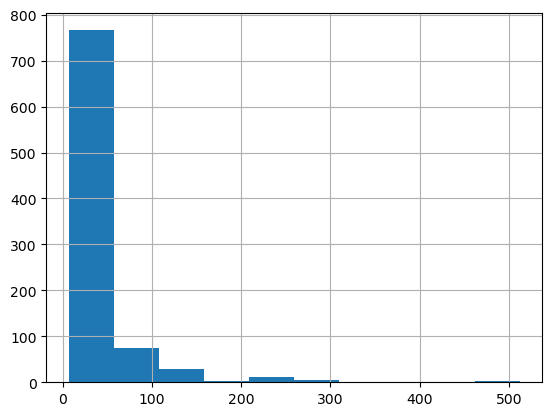

In [15]:
%matplotlib inline
(data['Fare']).hist()

In [16]:
import numpy as np


<AxesSubplot:>

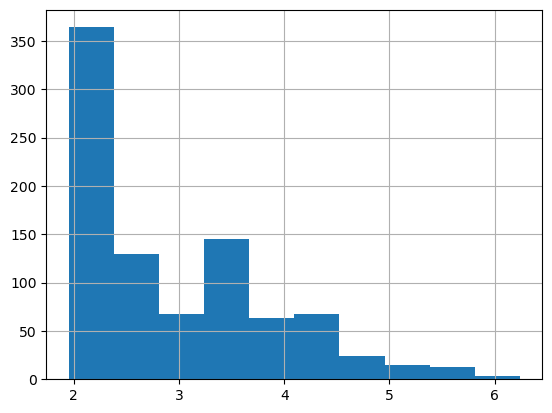

In [17]:
(np.log(data['Fare'])).hist()